### Forecasting Assignment

In [3]:
import pandas as pd 
from numpy import sqrt
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, time
import statsmodels.tsa.stattools as tsa

In [4]:
data = pd.read_excel('Airlines+Data.xlsx')
data[:3]

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [5]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
data.shape

(96, 2)

In [7]:
# checking the null values
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
# Checking the datatype of the attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format = True)
indexedDataset = data.set_index(['Month'])
data.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


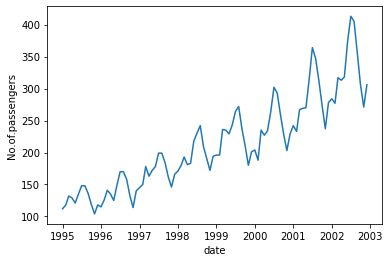

In [62]:
plt.xlabel("date")
plt.ylabel("No.of.passengers")
plt.plot(indexedDataset)
plt.show()

In [11]:
rolmean = indexedDataset.rolling(window=12).mean()

In [12]:
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


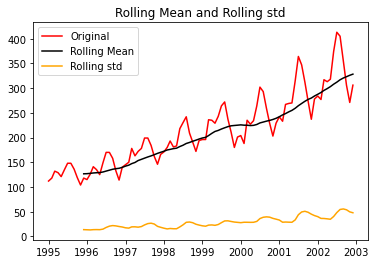

In [13]:
orig = plt.plot(indexedDataset, color='red', label = 'Original')
mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'orange', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling std')
plt.show(block=False)

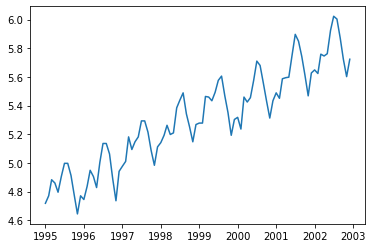

In [61]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
plt.show()

In [15]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

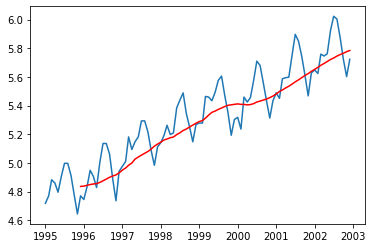

In [60]:
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')
plt.show()

In [17]:
df = indexedDataset_logScale - movingAverage
df.head(4)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN


In [18]:
df.dropna(inplace = True)

In [19]:
df[:3]

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566


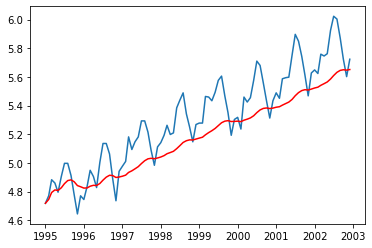

In [59]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')
plt.show()

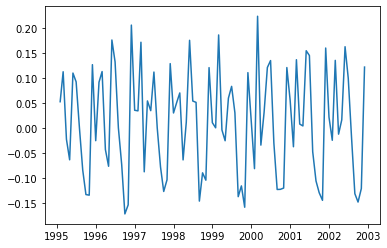

In [58]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale-exponentialDecayWeightedAverage
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

In [22]:
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-01-01,NaN
1995-02-01,0.052186
1995-03-01,0.112117


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990


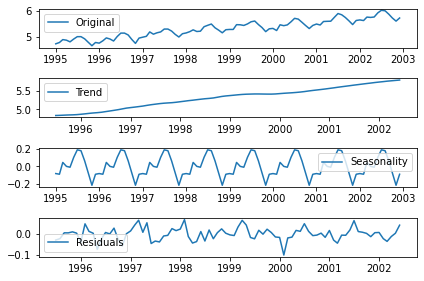

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
decompositionLogData = residual
decompositionLogData.dropna(inplace=True)

In [25]:
from statsmodels.tsa.stattools import acf,pacf

In [26]:
acf = acf(datasetLogDiffShifting, nlags = 20)
pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

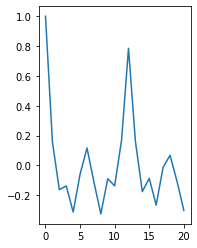

In [57]:
plt.subplot(121)
plt.plot(acf)
plt.show()

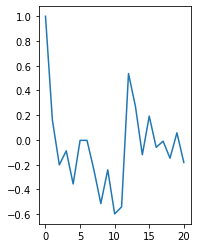

In [56]:
plt.subplot(122)
plt.plot(pacf)
plt.show()

### stationarity check

In [29]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest= tsa.adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

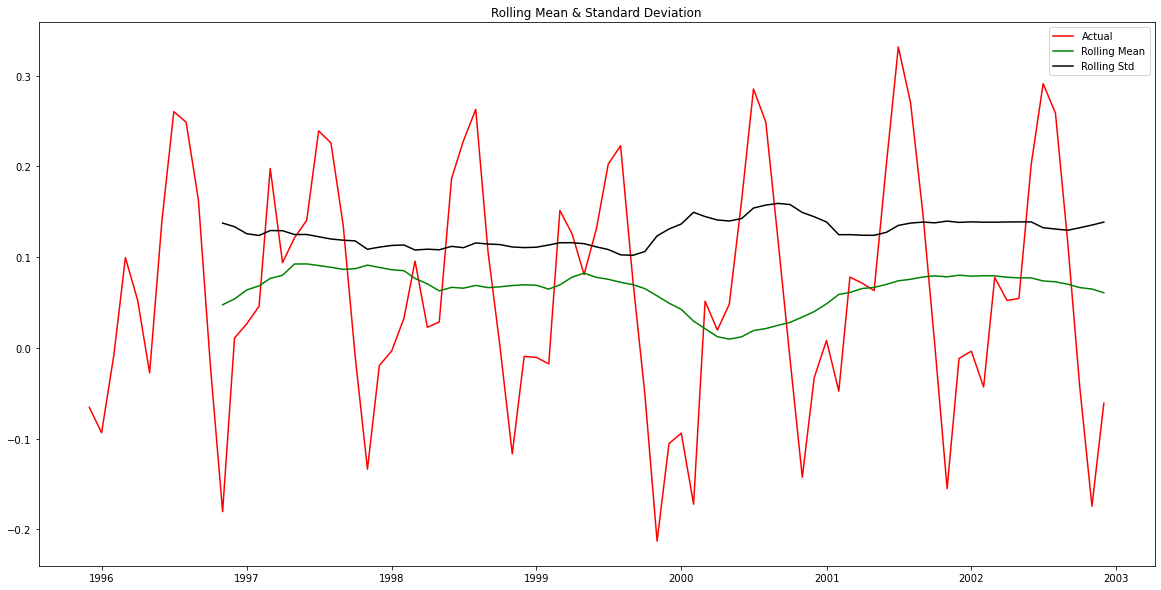

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [30]:
stationarity(df)

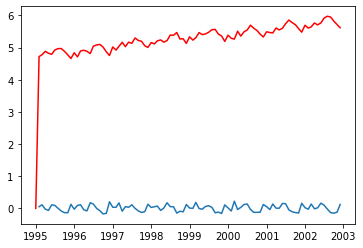

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(indexedDataset_logScale, order= (2,1,2))
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.show()

In [45]:
predictions_ARIMA_diff = pd.Series(results_AR. fittedvalues,copy = True)

In [46]:
predictions_ARIMA_diff

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776293
1995-04-01    4.882915
1995-05-01    4.823605
                ...   
2002-08-01    5.973012
2002-09-01    5.948908
2002-10-01    5.824492
2002-11-01    5.716514
2002-12-01    5.615860
Length: 96, dtype: float64

In [47]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1995-01-01      0.000000
1995-02-01      4.718499
1995-03-01      9.494792
1995-04-01     14.377706
1995-05-01     19.201311
                 ...    
2002-08-01    479.813396
2002-09-01    485.762304
2002-10-01    491.586796
2002-11-01    497.303310
2002-12-01    502.919170
Length: 96, dtype: float64

In [48]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

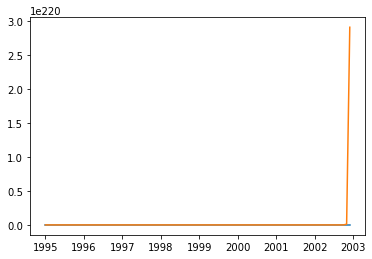

In [55]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.show()

In [52]:
results_AR.predict(1,264)
results = results_AR.forecast(steps = 100)

In [53]:
results[1]

5.763414506704794

### ====================================================================